In [1]:
from commonfunctions import *
import importlib

import segmenterFunc
importlib.reload(segmenterFunc)
from segmenterFunc import preprocess_frame, segment_hand, segmenter, adaptive_thresholding


%reload_ext autoreload
%autoreload 2

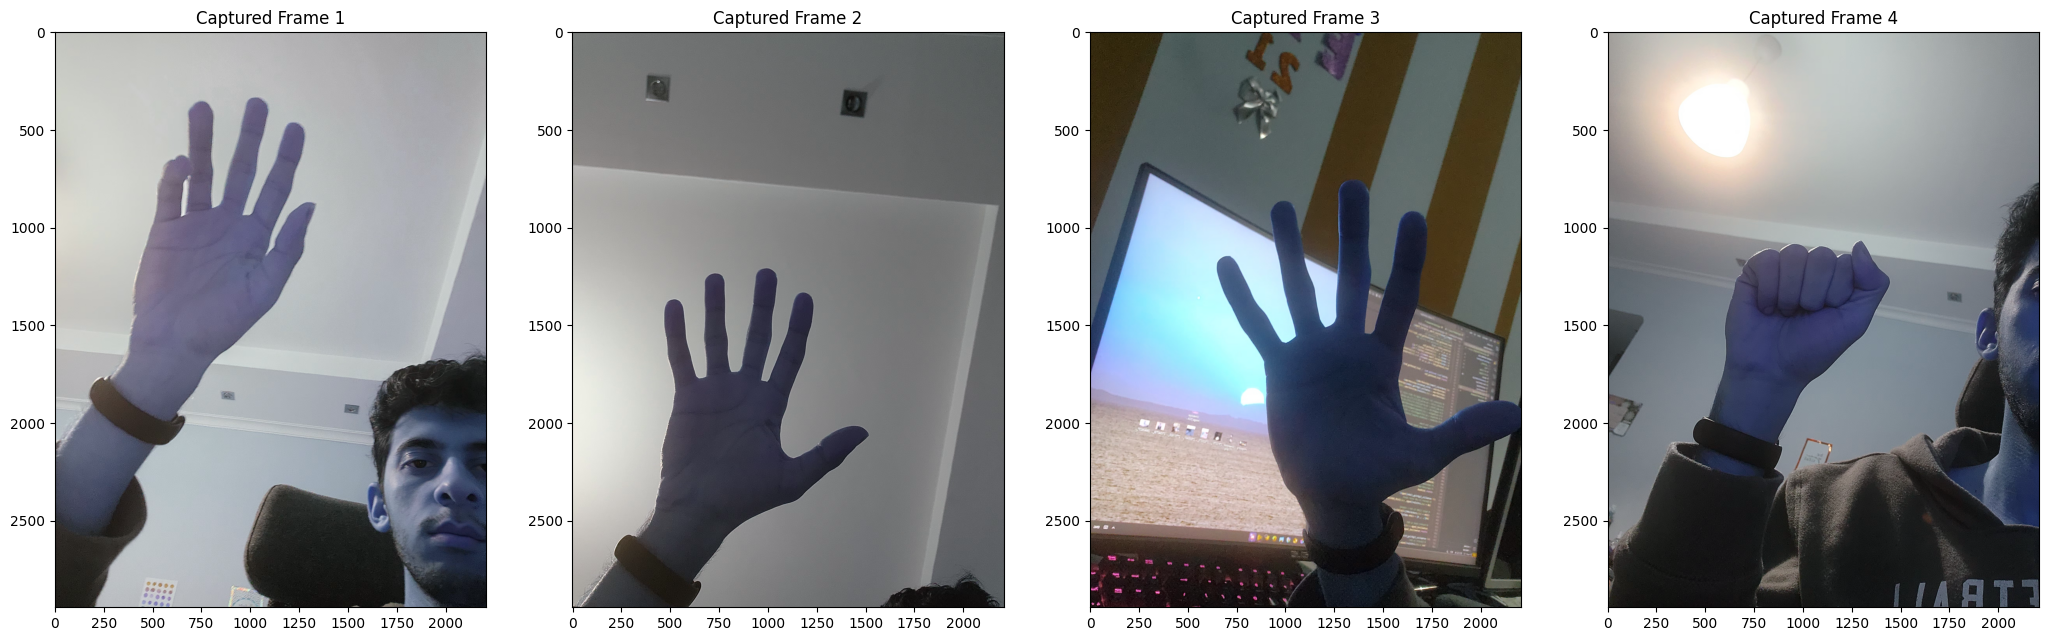

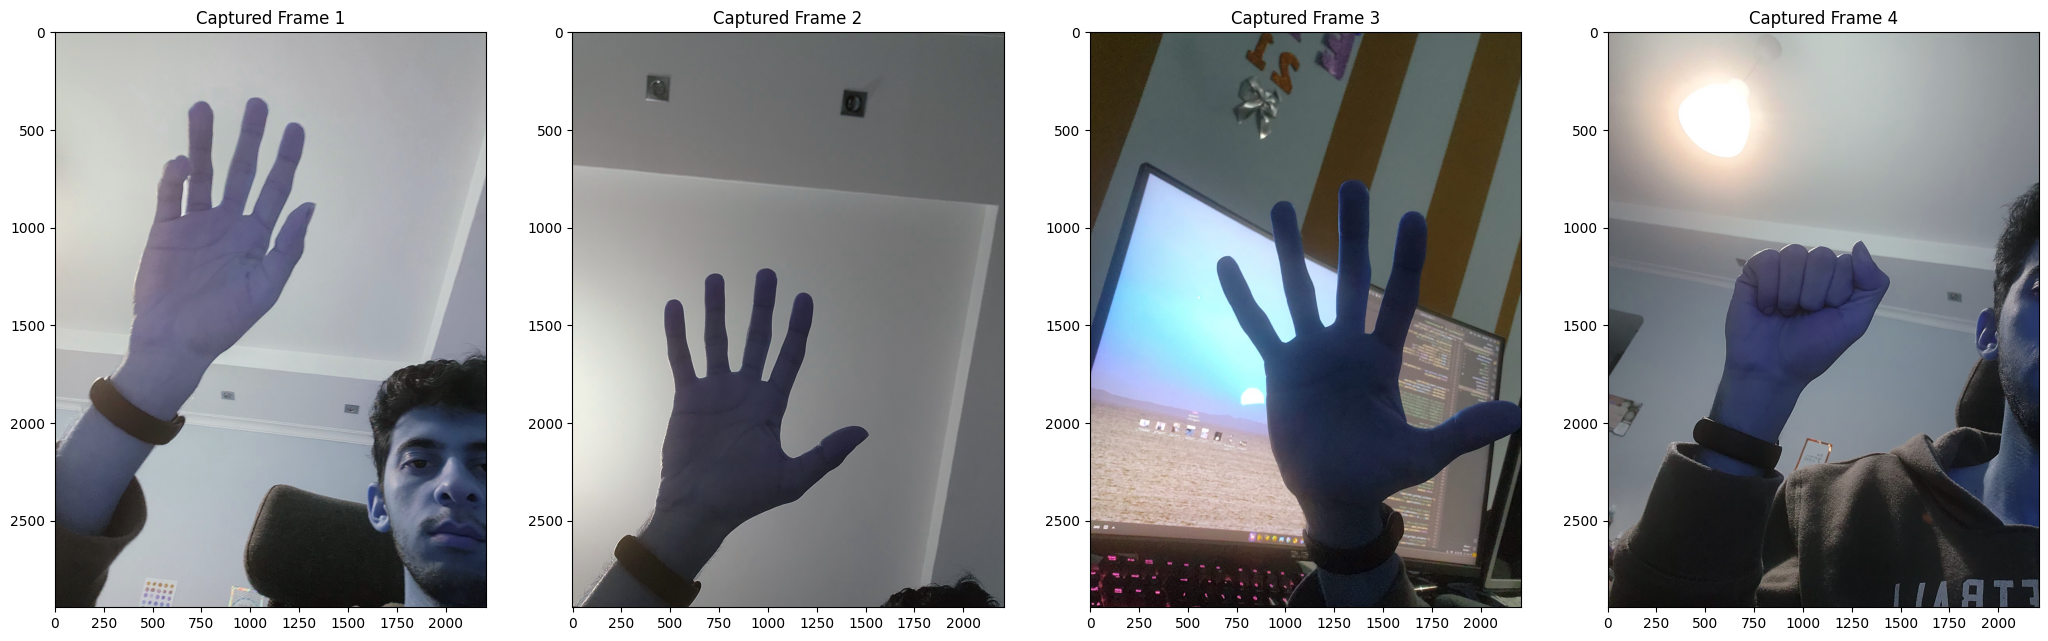

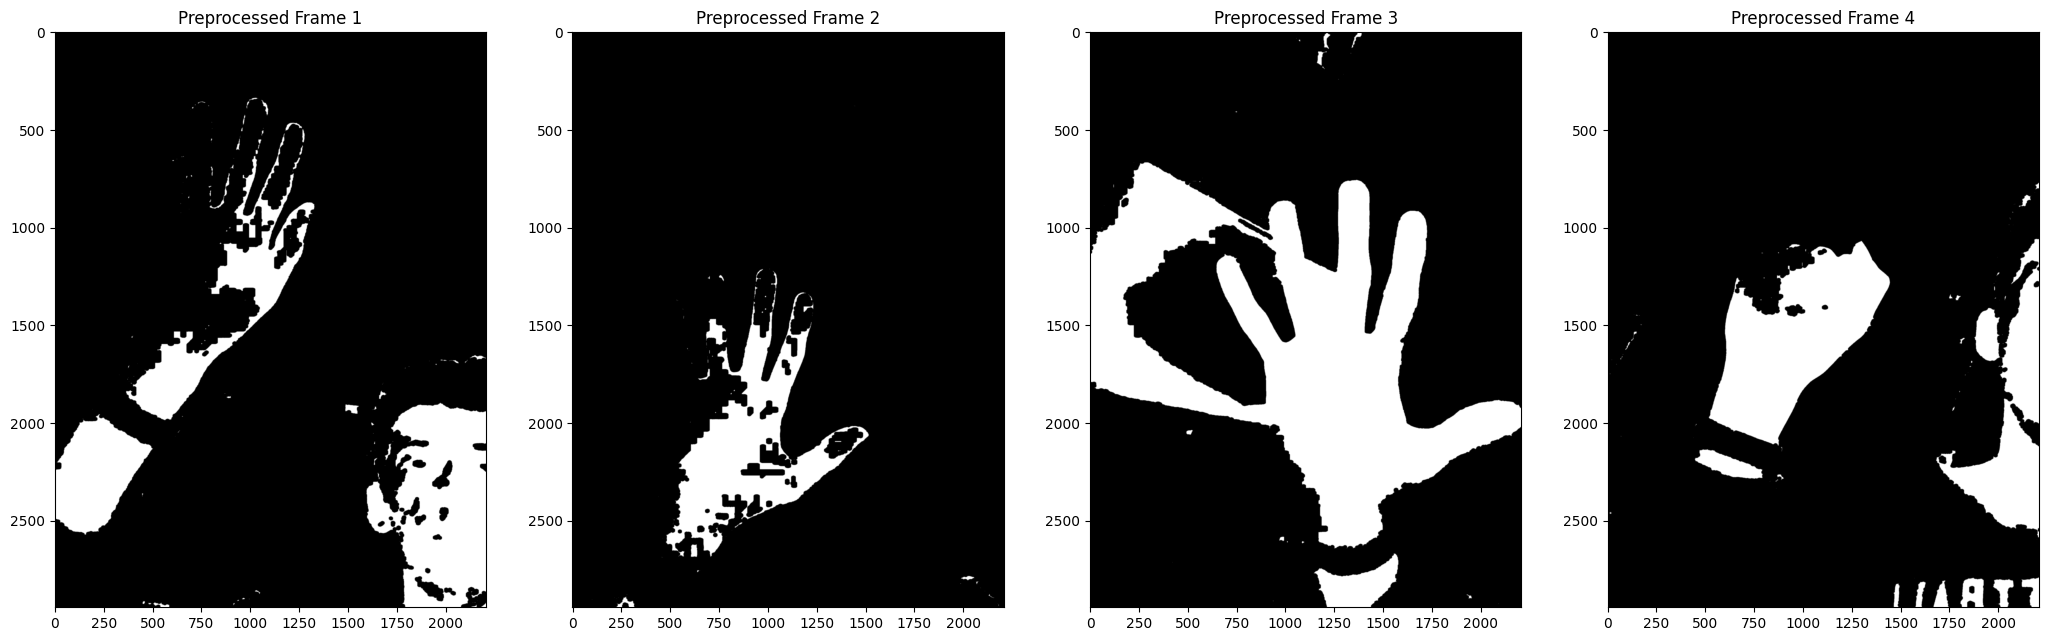

In [103]:
# Test preprocess_frame
capturedFrame1 = cv2.imread('Imgs/ex1 (1).jpg')
capturedFrame2 = cv2.imread('Imgs/ex1 (2).jpg')
capturedFrame3 = cv2.imread('Imgs/ex1 (3).jpg')  
capturedFrame4 = cv2.imread('Imgs/ex1 (4).jpg')
show_images([capturedFrame1, capturedFrame2, capturedFrame3, capturedFrame4], ['Captured Frame 1', 'Captured Frame 2', 'Captured Frame 3', 'Captured Frame 4'])
capturedFrame1, preprocess_frame1 = preprocess_frame(capturedFrame1)
capturedFrame2, preprocess_frame2 = preprocess_frame(capturedFrame2)
capturedFrame3, preprocess_frame3 = preprocess_frame(capturedFrame3)
capturedFrame4, preprocess_frame4 = preprocess_frame(capturedFrame4)

show_images([capturedFrame1, capturedFrame2, capturedFrame3, capturedFrame4], ['Captured Frame 1', 'Captured Frame 2', 'Captured Frame 3', 'Captured Frame 4'])
show_images([preprocess_frame1, preprocess_frame2, preprocess_frame3, preprocess_frame4], ['Preprocessed Frame 1', 'Preprocessed Frame 2', 'Preprocessed Frame 3', 'Preprocessed Frame 4'])


Best Bounding Box:  (242, 338, 1208, 1838)
Best Bounding Box:  (348, 1041, 1300, 1832)
Best Bounding Box:  (0, 422, 2208, 2473)
Best Bounding Box:  (397, 940, 1162, 1312)


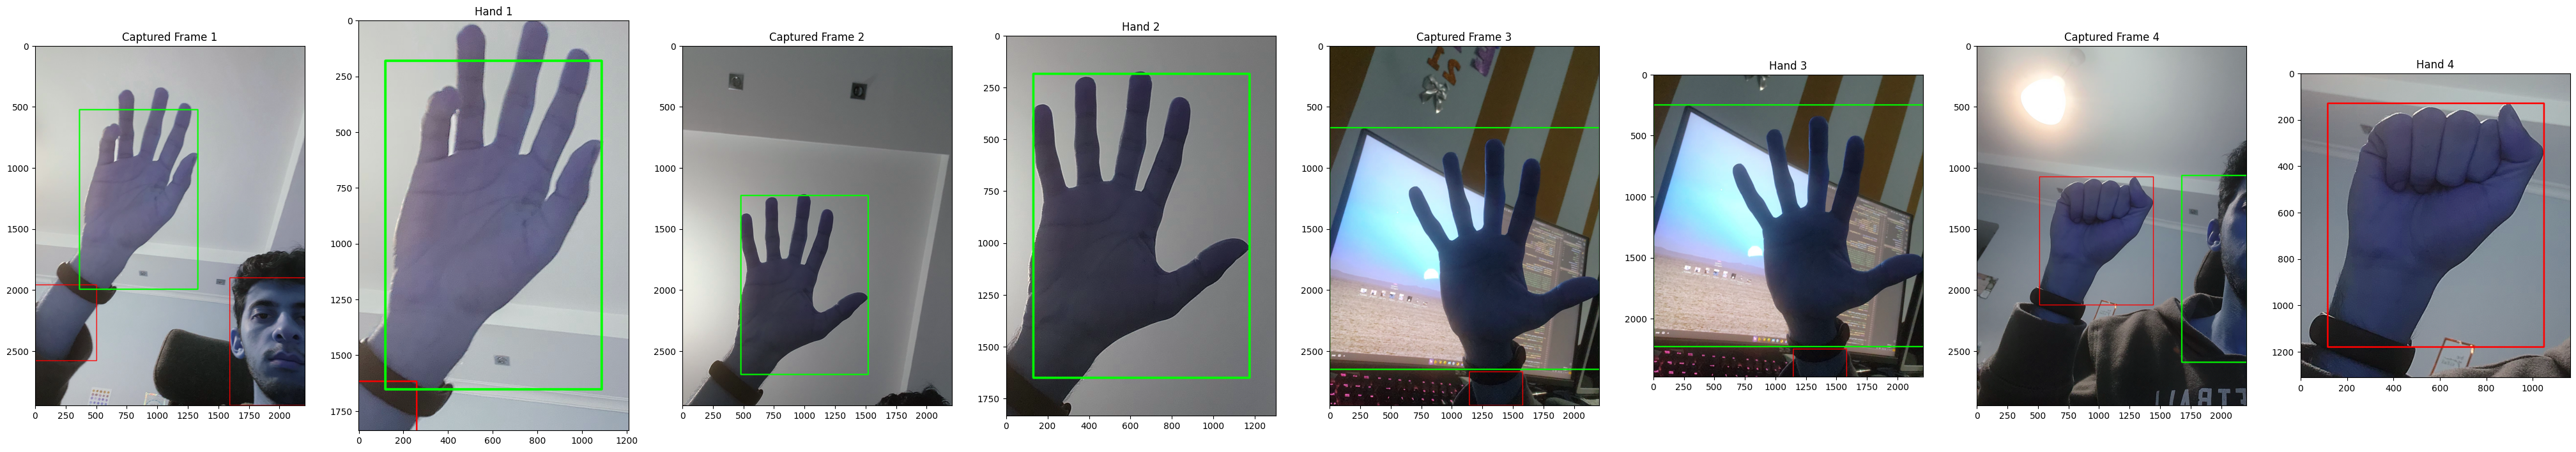

In [104]:
# Test segment_hand
bounding_box1 = segment_hand(preprocess_frame1, capturedFrame1)
bounding_box2 = segment_hand(preprocess_frame2, capturedFrame2)
bounding_box3 = segment_hand(preprocess_frame3, capturedFrame3)
bounding_box4 = segment_hand(preprocess_frame4, capturedFrame4)
Hand1 = capturedFrame1[bounding_box1[1]:bounding_box1[1]+bounding_box1[3], bounding_box1[0]:bounding_box1[0]+bounding_box1[2]]
Hand2 = capturedFrame2[bounding_box2[1]:bounding_box2[1]+bounding_box2[3], bounding_box2[0]:bounding_box2[0]+bounding_box2[2]]
Hand3 = capturedFrame3[bounding_box3[1]:bounding_box3[1]+bounding_box3[3], bounding_box3[0]:bounding_box3[0]+bounding_box3[2]]
Hand4 = capturedFrame4[bounding_box4[1]:bounding_box4[1]+bounding_box4[3], bounding_box4[0]:bounding_box4[0]+bounding_box4[2]]
show_images([capturedFrame1, Hand1, capturedFrame2, Hand2, capturedFrame3, Hand3, capturedFrame4, Hand4], ['Captured Frame 1', 'Hand 1', 'Captured Frame 2', 'Hand 2', 'Captured Frame 3', 'Hand 3', 'Captured Frame 4', 'Hand 4'])

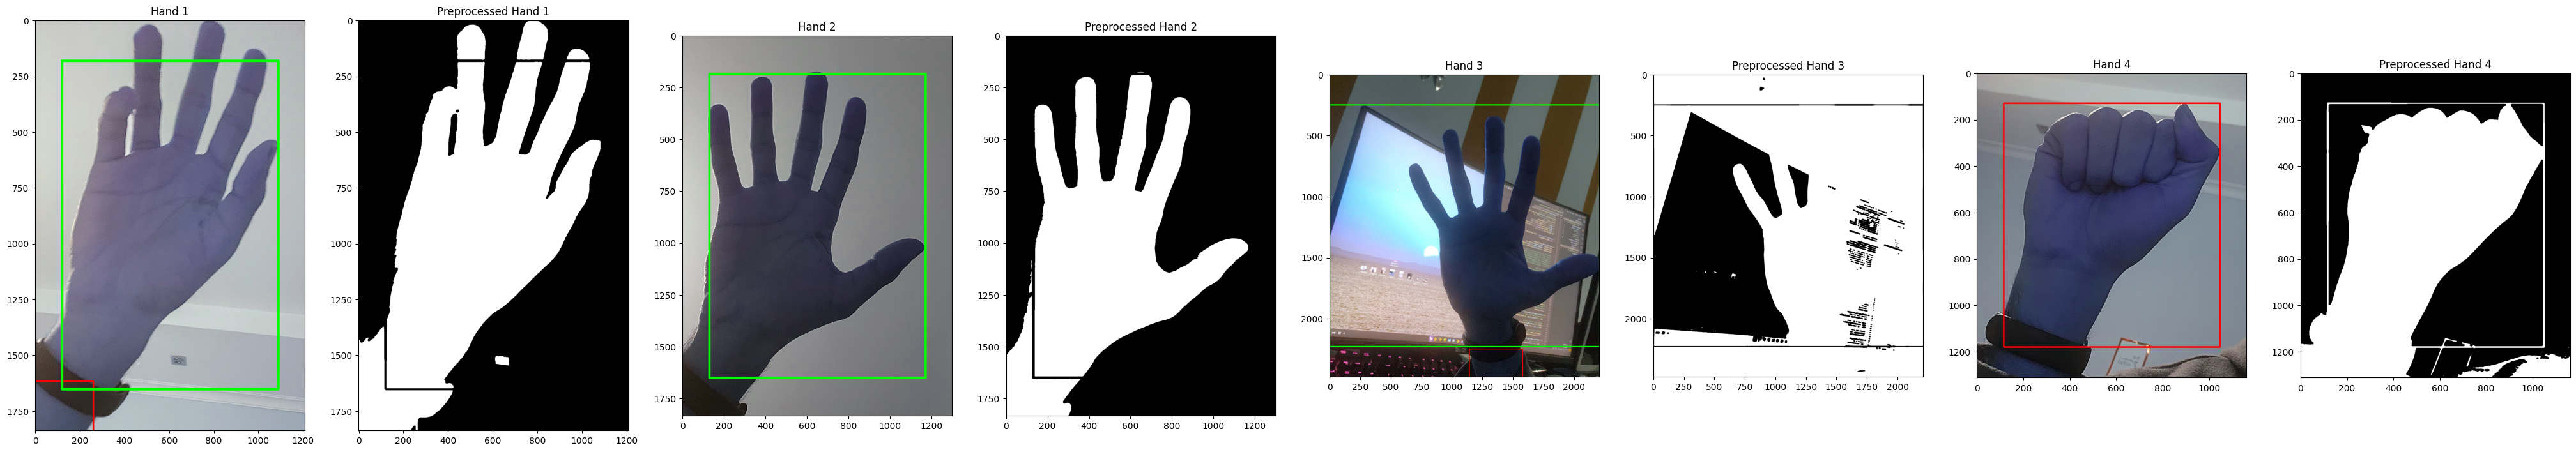

In [127]:
preprocess_Hand1 = adaptive_thresholding(Hand1)
preprocess_Hand2 = adaptive_thresholding(Hand2)
preprocess_Hand3 = adaptive_thresholding(Hand3)
preprocess_Hand4 = adaptive_thresholding(Hand4)
show_images([Hand1, preprocess_Hand1, Hand2, preprocess_Hand2, Hand3, preprocess_Hand3, Hand4, preprocess_Hand4], ['Hand 1', 'Preprocessed Hand 1', 'Hand 2', 'Preprocessed Hand 2', 'Hand 3', 'Preprocessed Hand 3', 'Hand 4', 'Preprocessed Hand 4'])


In [84]:
import numpy as np

def convexHull(points, clockwise=False, returnPoints=True):
    points = np.asarray(points)
    n = len(points)
    if n == 0:
        return np.array([])

    # Sort points lexicographically (tuples compare lexicographically).
    points = sorted(points.tolist())

    # Build the lower hull
    lower = []
    for p in points:
        while len(lower) >= 2 and np.cross(np.subtract(lower[-1], lower[-2]), np.subtract(p, lower[-1])) <= 0:
            lower.pop()
        lower.append(tuple(p))

    # Build the upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and np.cross(np.subtract(upper[-1], upper[-2]), np.subtract(p, upper[-1])) <= 0:
            upper.pop()
        upper.append(tuple(p))

    # Concatenate lower and upper hull to get the full hull
    full_hull = lower[:-1] + upper[:-1]

    if not returnPoints:
        # Convert points back to numpy arrays for indexing
        points = np.asarray(points)
        full_hull = [np.array(p) for p in full_hull]
        # Return indices of the hull points
        hull_indices = [np.where((points == p).all(axis=1))[0][0] for p in full_hull]
        return np.array(hull_indices)
    else:
        # Return the hull points
        return np.array(full_hull)

# Example usage
points = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [0, 3], [3, 0], [1, 2], [2, 1]])
hull = convexHull(points, clockwise=False, returnPoints=True)
print("Convex Hull Points:", hull)

hull_indices = convexHull(points, clockwise=False, returnPoints=False)
print("Convex Hull Indices:", hull_indices)

Convex Hull Points: [[0 0]
 [3 0]
 [3 3]
 [0 3]]
Convex Hull Indices: [0 6 7 1]


In [ ]:
# import numpy as np

# def sklansky(points, start, end, stack, inc):
#     stack.append(start)
#     if start == end:
#         return len(stack)

#     stack.append(start + inc)

#     for i in range(start + 2 * inc, end + inc, inc):
#         while len(stack) > 1:
#             prev = stack[-2]
#             curr = stack[-1]
#             dx1 = points[curr][0] - points[prev][0]
#             dy1 = points[curr][1] - points[prev][1]
#             dx2 = points[i][0] - points[curr][0]
#             dy2 = points[i][1] - points[curr][1]
#             if dy1 * dx2 <= dy2 * dx1:
#                 stack.pop()
#             else:
#                 break
#         stack.append(i)
#     return len(stack)

# def convexHull(points, returnPoints=True, clockwise=False):
    
#     points = np.asarray(points, dtype=np.float32)
    
#     # Ensure points is 2D
#     if points.ndim == 1:
#         points = points.reshape(-1, 2)
    
#     total = len(points)

#     if total == 0:
#         return np.array([], dtype=np.int32) if not returnPoints else np.array([], dtype=np.float32)

#     pointer = np.arange(total)

#     # Sort points by x-coordinate
#     sorted_indices = np.lexsort((points[:, 1], points[:, 0]))
#     points = points[sorted_indices]
#     pointer = pointer[sorted_indices]

#     # Find min and max y indices
#     miny_ind, maxy_ind = 0, 0
#     for i in range(1, total):
#         if points[i, 1] < points[miny_ind, 1]:
#             miny_ind = i
#         if points[i, 1] > points[maxy_ind, 1]:
#             maxy_ind = i

#     hull = []

#     if np.all(points[0] == points[-1]):
#         hull.append(0)
#     else:
#         # Upper half
#         tl_stack = []
#         sklansky(points, 0, maxy_ind, tl_stack, 1)

#         tr_stack = []
#         sklansky(points, total - 1, maxy_ind, tr_stack, -1)

#         if not clockwise:
#             tl_stack, tr_stack = tr_stack, tl_stack

#         hull.extend(pointer[tl_stack[:-1]])
#         hull.extend(pointer[tr_stack[:-1]][::-1])

#         stop_idx = tr_stack[1] if len(tr_stack) > 2 else (tl_stack[-2] if len(tl_stack) > 2 else -1)

#         # Lower half
#         bl_stack = []
#         sklansky(points, 0, miny_ind, bl_stack, 1)

#         br_stack = []
#         sklansky(points, total - 1, miny_ind, br_stack, -1)

#         if clockwise:
#             bl_stack, br_stack = br_stack, bl_stack

#         hull.extend(pointer[bl_stack[:-1]])
#         hull.extend(pointer[br_stack[:-1]][::-1])

#     if not returnPoints:
#         return np.array(hull, dtype=np.int32)
#     else:
#         return points[hull]

# # Example usage
# points = np.array([[0, 0], [1, 1], [2, 2], [3, 1], [1, -1]], dtype=np.float32)
# result = convexHull(points, returnPoints=True, clockwise=False)
# print(result)


[[2. 2.]
 [0. 0.]
 [0. 0.]
 [2. 2.]]


In [86]:
import numpy as np

def convexity_defects(points, hull_points):
    try:
        points = np.array(points, dtype=np.int32)
        hull_points = np.array(hull_points, dtype=np.int32)
        
        # this will find the indices of the hull points in the original points array
        hull_indices = [np.where((points == p).all(axis=1))[0][0] for p in hull_points]

        # We don't have a closed shape so we cannot compute convexity defects
        npoints = len(points)
        if npoints <= 3:
            print("Not enough points to form defects.")
            return []

        hpoints = len(hull_indices)
        if hpoints < 3:
            print("Not enough hull points to form defects.")
            return []

        defects = []
        if hpoints < 3:
            print("Hull has less than 3 points, contour is always convex.")
            return defects

        # Check hull orientation (clockwise or anti-clockwise) to determine the starting point
        rev_orientation = ((hull_indices[1] > hull_indices[0]) + (hull_indices[2] > hull_indices[1]) + (hull_indices[0] > hull_indices[2])) != 2

        hcurr = hull_indices[0] if rev_orientation else hull_indices[-1]

        for i in range(hpoints):
            hnext = hull_indices[hpoints - i - 1] if rev_orientation else hull_indices[i]
            
            # Notice that: the hull elements are 0-based indices of the convex hull points 
            # in the contour array (since the set of convex hull points is a subset of the original contour point set).
            pt0 = points[hcurr]
            pt1 = points[hnext]
            dx0 = pt1[0] - pt0[0]
            dy0 = pt1[1] - pt0[1]
            
            # 1) In case the edge length is 0 (dx = 0 and dy = 0) the scale will be 0 as the distance is 0
            # 2) Otherwise the scale will be 1/edge_length for normalization 
            #    as we don't want the edge length to affect the defect depth calculation
            scale = 0. if dx0 == 0 and dy0 == 0 else 1. / np.sqrt(dx0 * dx0 + dy0 * dy0)

            defect_deepest_point = -1
            defect_depth = 0
            is_defect = False
            j = hcurr

            while True:
                j += 1
                if j >= npoints:
                    j = 0
                if j == hnext:
                    break

                dx = points[j][0] - pt0[0]
                dy = points[j][1] - pt0[1]
                dist = abs(-dy0 * dx + dx0 * dy) * scale

                if dist > defect_depth:
                    defect_depth = dist
                    defect_deepest_point = j
                    is_defect = True

            if is_defect:
                idepth = int(round(defect_depth * 256))
                defects.append([hcurr, hnext, defect_deepest_point, idepth])

            hcurr = hnext

        return defects
    except Exception as e:
        print(f"Error in convexity_defects: {e}")
        print(f"Points: {points}")
        print(f"Hull Points: {hull_points}")
        return []

# # Example usage
# points = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [0, 3], [3, 0], [1, 2], [2, 1]])
# hull_points = convexHull(points, returnPoints=True)
# defects = convexity_defects(points, hull_points)
# print("Convexity Defects:", defects)

In [60]:
def convexity_defects2(points, hull):
    try:
        points = np.array(points, dtype=np.int32)
        hull = np.array(hull, dtype=np.int32)
        ## we dont have a closed shape so we can not compute convexity defects
        npoints = len(points)
        if npoints <= 3:
            print("Not enough points to form defects.")
            return []

        hpoints = len(hull)
        if hpoints < 3:
            print("Not enough hull points to form defects.")
            return []

        # print(f"Number of points: {npoints}, Number of hull points: {hpoints}")

        defects = []
        if hpoints < 3:
            print("Hull has less than 3 points, contour is always convex.")
            return defects
        ## check hull orientation (clockwise or anti) to determine the starting point
        rev_orientation = ((hull[1] > hull[0]) + (hull[2] > hull[1]) + (hull[0] > hull[2])) != 2

        hcurr = hull[0] if rev_orientation else hull[-1]

        for i in range(hpoints):
            hnext = hull[hpoints - i - 1] if rev_orientation else hull[i]
            
            # notice that: the hull elements are 0-based indices of the convex hull points 
            # in the contour array (since the set of convex hull points is a subset of the original contour point set).
            pt0 = points[hcurr]
            pt1 = points[hnext]
            dx0 = pt1[0] - pt0[0]
            dy0 = pt1[1] - pt0[1]
            
            ## 1) in case the edge length is 0 (dx = 0 and dy = 0) the scale will be 0 as the distance is 0
            ## 2) othewise the scale will be 1/edge_length for normalization 
            ##    as we dont want the edge length to affect the defect depth calculation
            scale = 0. if dx0 == 0 and dy0 == 0 else 1. / np.sqrt(dx0 * dx0 + dy0 * dy0)

            defect_deepest_point = -1
            defect_depth = 0
            is_defect = False
            j = hcurr

            while True:
                j += 1
                if j >= npoints:
                    j = 0
                if j == hnext:
                    break

                dx = points[j][0] - pt0[0]
                dy = points[j][1] - pt0[1]
                dist = abs(-dy0 * dx + dx0 * dy) * scale

                if dist > defect_depth:
                    defect_depth = dist
                    defect_deepest_point = j
                    is_defect = True

            if is_defect:
                idepth = int(round(defect_depth * 256))
                defects.append([hcurr, hnext, defect_deepest_point, idepth])

            hcurr = hnext

        return defects
    except Exception as e:
        print(f"Error in convexity_defects: {e}")
        print(f"Points: {points}")
        print(f"Hull: {hull}")
        return []

def angle_between_points(pt1, pt2, pt0):
    dx1 = pt1[0] - pt0[0]
    dy1 = pt1[1] - pt0[1]
    dx2 = pt2[0] - pt0[0]
    dy2 = pt2[1] - pt0[1]
    angle = math.atan2(dy1, dx1) - math.atan2(dy2, dx2)
    return abs(angle * 180.0 / math.pi)

def filterDefects( defects, contour):
        try:
            filtered_defects= []
            count_defects = 0
            for defect in defects:
                start_idx, end_idx, far_idx, depth = defect
                start = tuple(contour[start_idx][0])
                end = tuple(contour[end_idx][0])
                far = tuple(contour[far_idx][0])
                angle = angle_between_points(start, end, far)
                if  angle < 90:  # Allow a small margin around 90 degrees
                    count_defects += 1
                    filtered_defects.append(defect)
            
            return filtered_defects,count_defects 
        except Exception as e:
            print(e)


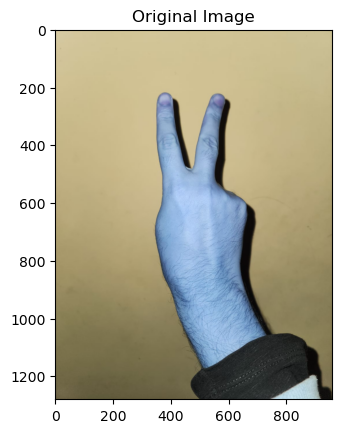

ACCEPTED Aspect ratio: 0.400208986415883, Solidity: 0.5657857043469721, Defects: 1, Direction: oneFingerUp
BEST SCORES. final_score: 0.401206969429579, size_score: 0.29828369140625, aspect_ratio_score: 0.400208986415883, solidity_score: 0.7799977432579832, circularity_penalty: 0.6882438849718042, defect_score: 0.14180941787562762, proximity_score: 0.012579876268305458
SECOND BEST SCORES. final_score: 0.401206969429579, size_score: 0.29828369140625, aspect_ratio_score: 0.400208986415883, solidity_score: 0.7799977432579832, circularity_penalty: 0.6882438849718042, defect_score: 0.14180941787562762, proximity_score: 0.012579876268305458
ACCEPTED Aspect ratio: 0.43967828418230565, Solidity: 0.6671822892826783, Defects: 1, Direction: oneFingerUp
BEST SCORES. final_score: 0.38327152594961483, size_score: 0.19912760416666667, aspect_ratio_score: 0.4396782841823057, solidity_score: 0.7673143539343006, circularity_penalty: 0.6765884005948954, defect_score: 0.09529179671332219, proximity_score: 

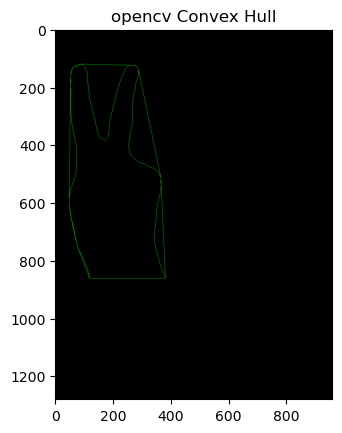

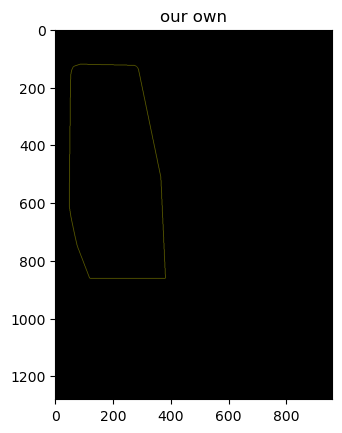

Convex Hull indices: [  0  14  20  28  36  52  92 100 114 198 198 526 226 100  85  69  52 136
 816 305 311 309 302 184 178 173 171 133  44  28  14   0]
Convex Hull indices openCV: [817 561 559 553 552 548 546 396 268 267 265 264 262 188 182 178 176 164
 140 136 132 124 123  31  29  27  25  21  11  10   8   0]
Number of defects: 1


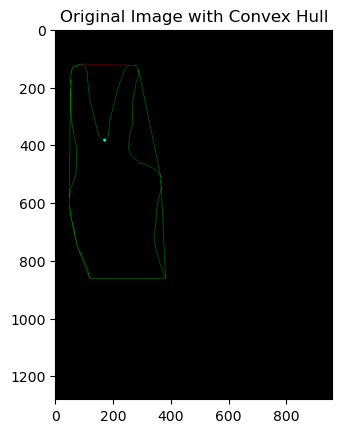

In [87]:
# img = io.imread('peace.jpg')
import cv2
img = cv2.imread('peace.jpg')
show_images([img], ['Original Image'])
results = segmenter(img)

        # At start we may not have a hand in the frame
if len(results) == 2:
    thresh, roi  = results
    full_frame_segmented = None 
    capturedFrame = np.zeros_like(img)  
else:
    thresh, roi,capturedFrame ,full_frame_segmented = results


contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=lambda c: cv2.contourArea(c), default=0)

hull = cv2.convexHull(contour)
hull_indices2 = cv2.convexHull(contour, returnPoints=False).flatten()
hull2 = convexHull(contour, returnPoints=True)
hull_indices = convexHull(contour, returnPoints=False)
# print("Convex Hull Points1:", hull)
# print("Convex Hull Points2:", hull_indices)
## i want to draw the hull on the original image
drawing = np.zeros_like(img)
drawing2 = np.zeros_like(img)
# cv2.drawContours(drawing, [hull], -1, (0, 255, 0), 3)
cv2.drawContours(drawing, [contour], -1, (0, 255, 0), 1)
cv2.drawContours(drawing, [hull], -1, (0, 255, 0), 1)
cv2.drawContours(drawing2, [hull2], -1, (255, 255, 0), 1)
show_images([drawing], ['opencv Convex Hull'])
show_images([drawing2], ['our own'])
print("Convex Hull indices:", hull_indices)
print("Convex Hull indices openCV:", hull_indices2)
defects = convexity_defects(contour[:, 0, :], hull2)
            
            
# Filter defects with approximately 90 degrees
filtered_defects, count_defects = filterDefects( defects, contour)
print("Number of defects:", count_defects)
# Draw filtered convexity defects
for defect in filtered_defects:
    start_idx, end_idx, far_idx, depth = defect
    start = tuple(contour[start_idx][0])
    end = tuple(contour[end_idx][0])
    far = tuple(contour[far_idx][0])
    cv2.line(drawing, start, end, (255, 0, 0), 1)  # Blue line for defect
    cv2.circle(drawing, far, 5, (0, 255, 255), -1)  # Yellow circle for defect point
show_images([drawing], ['Original Image with Convex Hull'])
